In [1]:
# 从 sklearn.feature_extraction 导入字典特征提取器
from sklearn.feature_extraction import DictVectorizer  
# 从 sklearn.feature_extraction.text 导入文本特征提取器，包括计数向量化器和 TF-IDF 向量化器
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  
# 从 sklearn.preprocessing 导入数据预处理工具，包括最小最大缩放器和标准缩放器
from sklearn.preprocessing import MinMaxScaler, StandardScaler  
# 从 sklearn.feature_selection 导入特征选择方法，用于方差过滤的 VarianceThreshold
from sklearn.feature_selection import VarianceThreshold  
# 从 sklearn.decomposition 导入主成分分析（PCA）用于降维
from sklearn.decomposition import PCA  
# 导入中文分词工具 jieba
import jieba  
# 导入 NumPy，科学计算的常用库
import numpy as np  
# 从 sklearn.impute 导入缺失值填充工具 SimpleImputer
from sklearn.impute import SimpleImputer  


# 1 特征中含有字符串的时候（当成类别），如何做特征抽取

In [2]:
def dictvec():
    """
    字典数据抽取
    :return: None
    """
    # 实例化 DictVectorizer，设置 sparse=True 表示返回稀疏矩阵
    # 稀疏矩阵只记录非零元素的位置，能够节省内存空间
    dict1 = DictVectorizer(sparse=True)  # 把sparse改为True，看看效果

    # 每个样本都是一个字典，有三个样本
    # 使用fit_transform方法进行数据的转换，将字典转化为稀疏矩阵形式
    data = dict1.fit_transform([{'city': '北京', 'temperature': 100},
                                {'city': '上海', 'temperature': 60},
                                {'city': '深圳', 'temperature': 30}])
    # 打印转换后的稀疏矩阵
    print(data)
    
    print('-' * 50)
    # 输出特征名称，查看每列特征对应的字典键
    print(dict1.get_feature_names_out())
    
    print('-' * 50)
    # 使用inverse_transform方法将稀疏矩阵转换回字典格式，查看每个特征代表的含义
    print(dict1.inverse_transform(data))  # 将稀疏矩阵逆转回去，得到原始数据的字典

    return None

# 调用dictvec函数
dictvec()

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	1.0
  (0, 3)	100.0
  (1, 0)	1.0
  (1, 3)	60.0
  (2, 2)	1.0
  (2, 3)	30.0
--------------------------------------------------
['city=上海' 'city=北京' 'city=深圳' 'temperature']
--------------------------------------------------
[{'city=北京': np.float64(1.0), 'temperature': np.float64(100.0)}, {'city=上海': np.float64(1.0), 'temperature': np.float64(60.0)}, {'city=深圳': np.float64(1.0), 'temperature': np.float64(30.0)}]


# 2 一段英文文本如何变为数值类型

In [3]:
def couvec():
    # 实例化CountVectorizer
    # max_df, min_df整数：指每个词的所有文档词频数不小于最小值，出现该词的文档数目小于等于max_df
    # max_df, min_df小数(0-1之间的）：某个词的出现的次数／所有文档数量
    # min_df=2
    # 默认会去除单个字母的单词，默认认为这个词对整个样本没有影响,认为其没有语义
    vector = CountVectorizer(min_df=2)

    # 调用fit_transform输入并转换数据

    res = vector.fit_transform(
        ["life is  short,i like python life",
         "life is too long,i dislike python",
         "life is short"])

    # 打印结果,把每个词都分离了
    print(vector.get_feature_names_out())
    print('-' * 50)
    print(res)
    print('-' * 50)
    print(type(res))
    # 对照feature_names，标记每个词出现的次数
    print('-' * 50)
    print(res.toarray())  #稀疏矩阵转换为数组
    print('-' * 50)
    #拿每个样本里的特征进行显示
    print(vector.inverse_transform(res)) # 将词频矩阵转换回原始文本对应的特征词
    return None


couvec()

['is' 'life' 'python' 'short']
--------------------------------------------------
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	2
  (0, 0)	1
  (0, 3)	1
  (0, 2)	1
  (1, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 0)	1
  (2, 3)	1
--------------------------------------------------
<class 'scipy.sparse._csr.csr_matrix'>
--------------------------------------------------
[[1 2 1 1]
 [1 1 1 0]
 [1 1 0 1]]
--------------------------------------------------
[array(['life', 'is', 'short', 'python'], dtype='<U6'), array(['life', 'is', 'python'], dtype='<U6'), array(['life', 'is', 'short'], dtype='<U6')]


# 一段汉字文本如何数值化，对于汉字不能用空格来分割

In [4]:
def countvec():
    """
    对文本进行特征值化,单个汉字单个字母不统计，因为单个汉字字母没有意义
    :return: None
    """
    cv = CountVectorizer()

    data = cv.fit_transform(["人生苦短，我喜欢 python python", "人生漫长，不用 python"])

    print(cv.get_feature_names_out())
    print('-' * 50)
    print(data)  #稀疏存储，只记录非零位置
    print('-' * 50)
    print(data.toarray())

    return None


countvec()

['python' '不用' '人生漫长' '人生苦短' '我喜欢']
--------------------------------------------------
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (2, 5)>
  Coords	Values
  (0, 3)	1
  (0, 4)	1
  (0, 0)	2
  (1, 0)	1
  (1, 2)	1
  (1, 1)	1
--------------------------------------------------
[[2 0 0 1 1]
 [1 1 1 0 0]]


## 1.3 掌握如何对中文进行分词

In [10]:


def cutword():
    """
    通过jieba对中文进行分词
    :return: 分词后的三个句子的字符串（每个词之间用空格隔开）
    """
    # 使用jieba.cut对中文句子进行分词
    con1 = jieba.cut("今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。")
    con2 = jieba.cut("我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。")
    con3 = jieba.cut("如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。")

    # 输出分词对象的类型，查看是否为生成器
    print(type(con1))
    print('-' * 50)
    
    # 将分词的生成器转换为列表，便于查看具体内容
    content1 = list(con1)
    content2 = list(con2)
    content3 = list(con3)
    
    # 打印每个句子的分词结果
    print(content1)
    print(content2)
    print(content3)
    
    # 输出分词后的结果，使用空格将每个词连接为一个字符串
    print('-' * 50)
    c1 = ' '.join(content1)  # 将第一个句子的分词结果转为字符串，单词之间用空格分隔
    c2 = ' '.join(content2)  # 同上，第二个句子的分词
    c3 = ' '.join(content3)  # 同上，第三个句子的分词

    return c1, c2, c3  # 返回分词后的文本


def hanzivec():
    """
    中文文本特征值化
    :return: None
    """
    c1, c2, c3 = cutword()  # 获取jieba分词好的中文文本
    print('-' * 50)
    
    # 打印分词后的中文文本
    print(c1)
    print(c2)
    print(c3)
    print('-' * 50)

    # 初始化CountVectorizer对象（用来将文本转为特征向量）
    cv = CountVectorizer()

    # 将分词后的文本进行特征提取，并生成词频矩阵
    data = cv.fit_transform([c1, c2, c3])

    # 打印生成的词汇表（特征名称）
    print(cv.get_feature_names_out())

    # 打印每个文档的词频矩阵（转换为数组格式）
    print(data.toarray())  # 将稀疏矩阵转换为密集矩阵，方便查看

    return None


# 调用hanzivec函数进行中文特征值化
# cutword() #函数生成的分词文本会被传递到 hanzivec 中
hanzivec() #对文本进行特征提取并打印结果



<class 'generator'>
--------------------------------------------------
['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
--------------------------------------------------
--------------------------------------------------
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。
我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。
如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
--------------------------------------------------
['一种' '不会' '不要' '之前' 

# 1.4 tf-idf

In [11]:
# 规范{'l1'，'l2'}，默认='l2'
# 每个输出行都有单位范数，或者：
#
# 'l2'：向量元素的平方和为 1。当应用 l2 范数时，两个向量之间的余弦相似度是它们的点积。
#
# 'l1'：向量元素的绝对值之和为 1。参见preprocessing.normalize。

# smooth_idf布尔值，默认 = True
# 通过在文档频率上加一来平滑 idf 权重，就好像看到一个额外的文档包含集合中的每个术语恰好一次。防止零分裂。
# 比如训练集中有某个词，测试集中没有，就是生僻词，就会造成n(x)分母为零，log(n/n(x)),从而出现零分裂

def tfidfvec():
    """
    中文特征值化，计算 TF-IDF 值
    :return: None
    """
    # 假设 cutword() 是一个函数，返回三个分词后的中文字符串
    # c1, c2, c3 分别表示三个文本内容
    c1, c2, c3 = cutword()

    # 打印分词后的文本结果
    print(c1, c2, c3)
    # print(type([c1, c2, c3])) # 可选：查看 [c1, c2, c3] 是否为列表类型

    # 创建一个 TfidfVectorizer 实例
    # smooth_idf=True 表示在计算 IDF 时平滑加 1（防止分母为 0）
    tf = TfidfVectorizer(smooth_idf=True)

    # 使用 fit_transform 对 [c1, c2, c3] 进行 TF-IDF 特征提取
    # [c1, c2, c3] 是一个包含分词字符串的列表，每个元素代表一段文本
    # 返回的 data 是稀疏矩阵，存储每个文本的 TF-IDF 特征值
    data = tf.fit_transform([c1, c2, c3])

    # 打印提取到的特征名称（即所有出现的词汇）
    print(tf.get_feature_names_out())

    # 打印分隔符，便于输出结果的分割
    print('-' * 50)

    # 打印 data 的类型，通常为 scipy.sparse.csr_matrix（稀疏矩阵）
    print(type(data))

    # 打印分隔符，便于输出结果的分割
    print('-' * 50)

    # 将稀疏矩阵转为密集矩阵（数组形式），并打印
    # 每一行代表一个文本，每一列代表一个特征词，值为对应的 TF-IDF 值
    print(data.toarray())

    # 返回 None，函数无具体返回值，仅用于打印和调试
    return None

# 调用函数 tfidfvec
tfidfvec()


<class 'generator'>
--------------------------------------------------
['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
--------------------------------------------------
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。 我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。 如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '

# 2 特征处理，不同的特征拉到到同一个量纲

In [14]:
def mm():
    """
    归一化处理
    :return: NOne
    """
    # 归一化缺点 容易受极值的影响
    #feature_range代表特征值范围，一般设置为(0,1),或者(-1,1),默认是(0,1)
    mm = MinMaxScaler(feature_range=(0, 1))

    data = mm.fit_transform([[90, 2, 10, 40], [60, 4, 15, 45], [75, 3, 13, 46]])

    print(data)
    print('-' * 50)
    out = mm.transform([[1, 2, 3, 4], [6, 5, 8, 7]])
    print(out)
    return None
    #transform和fit_transform不同是，transform用于测试集，而且不会重新找最小值和最大值
    # 关于 transform 和 fit_transform 的区别：
    # - fit_transform：用于训练集，同时计算最小值和最大值，并完成归一化。
    # - transform：用于测试集，直接按照训练集的最小值和最大值进行归一化，不会重新计算范围。



mm()

[[1.         0.         0.         0.        ]
 [0.         1.         1.         0.83333333]
 [0.5        0.5        0.6        1.        ]]
--------------------------------------------------
[[-1.96666667  0.         -1.4        -6.        ]
 [-1.8         1.5        -0.4        -5.5       ]]


In [17]:
def stand():
    """
    标准化缩放，不是标准正太分布，只均值为0，方差为1的分布
    :return:
    """
    std = StandardScaler()

    data = std.fit_transform([[1., -1., 3.],
                              [2., 4., 2.],
                              [4., 6., -1.]])

    print(data)
    print('-' * 50)
    print(std.mean_)
    print('-' * 50)
    print(std.var_)  #方差
    print('-' * 50)
    print(std.n_samples_seen_)  # 样本数
    return data


data = stand()

[[-1.06904497 -1.35873244  0.98058068]
 [-0.26726124  0.33968311  0.39223227]
 [ 1.33630621  1.01904933 -1.37281295]]
--------------------------------------------------
[2.33333333 3.         1.33333333]
--------------------------------------------------
[1.55555556 8.66666667 2.88888889]
--------------------------------------------------
3
[[-1.06904497 -1.35873244  0.98058068]
 [-0.26726124  0.33968311  0.39223227]
 [ 1.33630621  1.01904933 -1.37281295]]


## transform和fit_transform不同是，transform用于测试集，而且不会重新找最小值和最大值,不会重新计算均值方差

# 3 缺失值处理


In [18]:
#下面是填补，针对删除，可以用pd和np
def im():
    """
    缺失值处理
    :return:None
    """
    # NaN, nan,缺失值必须是这种形式，如果是？号(或者其他符号)，就要replace换成这种
    #mean, median, most_frequent(众数), constant
    im = SimpleImputer(missing_values=np.nan, strategy='mean')

    data = im.fit_transform([[1, 2], [np.nan, 3], [7, 6], [3, 2]])

    print(data)

    return None


im()

[[1.         2.        ]
 [3.66666667 3.        ]
 [7.         6.        ]
 [3.         2.        ]]


# 4 降维
# 降维就是特征数变少
# 降维可以提高模型训练速度（特征变少）

In [19]:
def var():
    """
    特征选择-删除低方差的特征
    :return: None
    """
    #默认只删除方差为0,threshold是方差阈值，删除比这个值小的那些特征
    var = VarianceThreshold(threshold=0.1)

    data = var.fit_transform([[0, 2, 0, 3],
                              [0, 1, 4, 3],
                              [0, 1, 1, 3]])

    print(data)
    print('-' * 50)
    # 获得剩余的特征的列编号
    print('The surport is %s' % var.get_support(True))
    return None


var()

[[2 0]
 [1 4]
 [1 1]]
--------------------------------------------------
The surport is [1 2]


In [25]:
def pca():
    """
    主成分分析进行特征降维
    :return: None
    """
    # n_ components:小数 0~1 90% 业界选择 90~95%

    # 当n_components的值为0到1之间的浮点数时，表示我们希望保留的主成分解释的方差比例。方差比例是指 得到输出的每一列的方差值和除以原有数据方差之和。
    # 具体而言，n_components=0.9表示我们希望选择足够的主成分，以使它们解释数据方差的90%。

    # n_components如果是整数   减少到的特征数量
    # 原始数据方差
    original_value = np.array([[2, 8, 4, 5],
                               [6, 3, 0, 8],
                               [5, 4, 9, 1]])
    print(np.var(original_value, axis=0).sum())  #最初数据每一列的方差，求和
    print('-' * 50)
    pca = PCA(n_components=0.9)

    data = pca.fit_transform(original_value)

    print(data)
    print(type(data))
    #计算data的方差和
    print(np.var(data, axis=0).sum())
    print('-' * 50)
    print(pca.explained_variance_ratio_)
    # 计算data的方差占总方差的比例
    print(pca.explained_variance_ratio_.sum())

    return None


pca()

29.333333333333336
--------------------------------------------------
[[-3.13587302e-16  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
<class 'numpy.ndarray'>
29.333333333333346
--------------------------------------------------
[0.75 0.25]
1.0


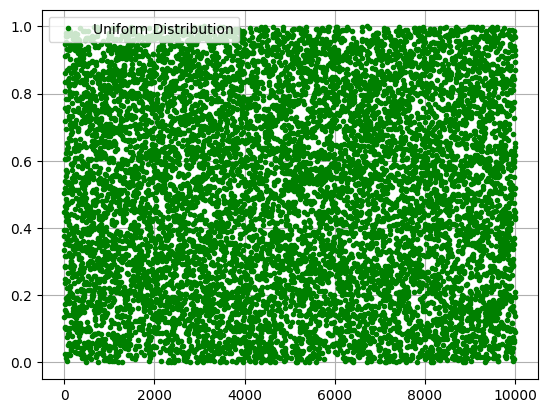

In [26]:
from matplotlib import pyplot as plt  # 导入 matplotlib 库中的 pyplot 模块用于绘图

# 生成 10000 个随机数，服从均匀分布，范围为 [0, 1)
x = np.random.rand(10000)  # np.random.rand 生成指定数量的随机数，这里是 10000 个

# 创建一个从 0 到 9999 的整数数组，作为横坐标（时间点）
t = np.arange(len(x))  # np.arange 返回一个从 0 到 len(x)-1 的数组，表示 x 中每个数据点的索引位置

# 绘制折线图，t 是横坐标，x 是纵坐标，'g.' 表示使用绿色点来表示每个数据点
plt.plot(t, x, 'g.', label="Uniform Distribution")

# 添加图例，'Uniform Distribution' 用作图例名称
plt.legend(loc="upper left")  # 图例放置在左上角

# 添加网格线，使图表更容易阅读
plt.grid()

# 显示绘制的图表
plt.show()
